In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from pathlib import Path
from sklearn.model_selection import train_test_split
import random
from collections import Counter
from tqdm import tqdm

In [2]:
for root, dirs, files in os.walk('/kaggle/input/stroke/New_data_Stroke_ver3/MRI'):
    print(f"📂 Folder: {root}")
    print(f"   📁 Subfolders: {dirs}")
    print(f"   📄 Files: {files[:5]}")  # Print only first 5 files per folder
    print("-" * 40)

📂 Folder: /kaggle/input/stroke/New_data_Stroke_ver3/MRI
   📁 Subfolders: ['ISCHAEMIC SRTROK', 'NORMAL', 'HEMORAGE STROK']
   📄 Files: []
----------------------------------------
📂 Folder: /kaggle/input/stroke/New_data_Stroke_ver3/MRI/ISCHAEMIC SRTROK
   📁 Subfolders: []
   📄 Files: ['623.jpg', '764.jpg', '771.jpg', '208.jpg', '820.jpg']
----------------------------------------
📂 Folder: /kaggle/input/stroke/New_data_Stroke_ver3/MRI/NORMAL
   📁 Subfolders: []
   📄 Files: ['623.jpg', '764.jpg', '1075.jpg', '771.jpg', '208.jpg']
----------------------------------------
📂 Folder: /kaggle/input/stroke/New_data_Stroke_ver3/MRI/HEMORAGE STROK
   📁 Subfolders: []
   📄 Files: ['208.jpg', '333.jpg', '45.jpg', '369.jpg', '56.jpg']
----------------------------------------


In [3]:
# Define your two label categories
class_map = {
    "NORMAL": 0,
    "ISCHAEMIC SRTROK": 1,
    "HEMORAGE STROK": 1,
}

base_path = Path('/kaggle/input/stroke/New_data_Stroke_ver3/MRI')



In [4]:
def get_image_paths(base_path, class_map):
    paths = []
    for folder in base_path.iterdir():
        if folder.is_dir() and folder.name in class_map:
            label = class_map[folder.name]
            for img_path in folder.glob('*'):
                if img_path.suffix.lower() in ['.jpg', '.jpeg', '.png']:
                    paths.append((str(img_path), label))
    return paths

def is_image_valid(path):
    try:
        img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
        return img is not None and img.size > 0
    except:
        return False

def load_image(path):
    return cv2.imread(path, cv2.IMREAD_GRAYSCALE)

def visualize_samples(X, y, n=5):
    plt.figure(figsize=(15, 3))
    random_indices = np.random.choice(len(X), size=n, replace=False)
    
    for i, idx in enumerate(random_indices):
        plt.subplot(1, n, i+1)
        plt.imshow(X[idx], cmap='gray')
        plt.title("Stroke" if y[idx] == 1 else "Normal")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

def check_dimensions(X):
    return Counter([img.shape for img in X])

def plot_intensity_histogram(X):
    all_pixels = np.concatenate([img.flatten() for img in X])
    plt.hist(all_pixels, bins=50, color='gray')
    plt.title('Pixel Intensity Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [5]:
# Load and validate data
labeled_paths = get_image_paths(base_path, class_map)
valid_labeled_paths = list(filter(lambda x: is_image_valid(x[0]), tqdm(labeled_paths, desc="Checking for corrupted files")))


Checking for corrupted files: 100%|██████████| 2376/2376 [00:15<00:00, 149.58it/s]


In [6]:
image_paths, labels = zip(*valid_labeled_paths)
X = list(map(load_image, tqdm(image_paths, desc="Loading images")))
y = list(labels)

# print(y)

Loading images: 100%|██████████| 2375/2375 [00:08<00:00, 293.85it/s]


In [7]:
# Display class distribution
class_counts = Counter(y)
print("Class distribution:", class_counts)

Class distribution: Counter({1: 1289, 0: 1086})


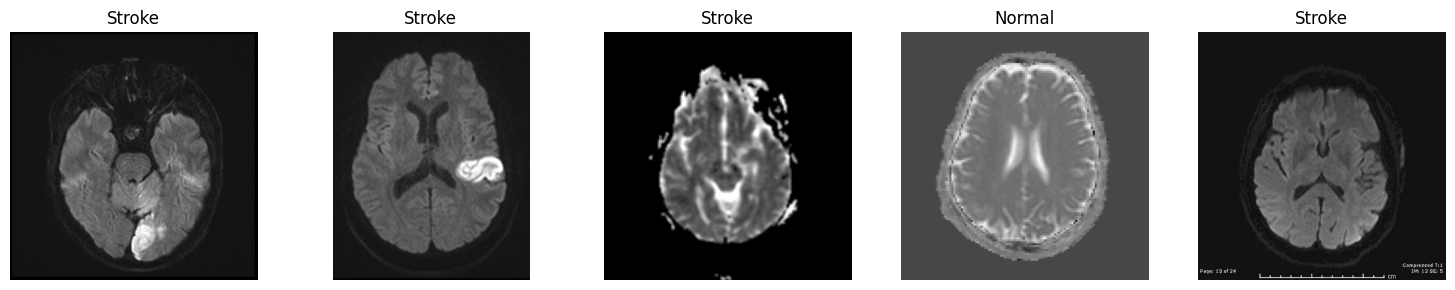

In [8]:
visualize_samples(X, y)

In [9]:
dims = check_dimensions(X)
print("Image dimension consistency:", dims)

Image dimension consistency: Counter({(630, 630): 782, (192, 192): 411, (128, 128): 179, (320, 320): 176, (176, 176): 103, (256, 256): 74, (352, 352): 57, (144, 144): 39, (288, 288): 32, (630, 570): 31, (630, 551): 28, (630, 556): 25, (224, 224): 21, (630, 546): 20, (598, 630): 17, (630, 493): 16, (630, 553): 15, (625, 630): 15, (579, 630): 15, (630, 571): 14, (630, 473): 14, (630, 541): 13, (576, 630): 13, (630, 491): 11, (630, 500): 10, (630, 512): 10, (630, 504): 9, (630, 482): 9, (630, 494): 9, (630, 549): 9, (256, 248): 9, (630, 533): 8, (630, 532): 8, (630, 550): 8, (630, 548): 8, (630, 527): 7, (630, 495): 7, (630, 591): 7, (630, 528): 7, (630, 433): 7, (630, 561): 7, (630, 543): 6, (630, 559): 6, (630, 488): 6, (630, 477): 5, (630, 472): 5, (630, 515): 5, (630, 603): 4, (589, 630): 4, (630, 499): 3, (630, 628): 3, (630, 509): 2, (531, 630): 2, (630, 444): 2, (630, 574): 2, (630, 522): 2, (630, 492): 2, (630, 476): 2, (591, 630): 2, (630, 516): 2, (320, 352): 2, (630, 534): 2, (

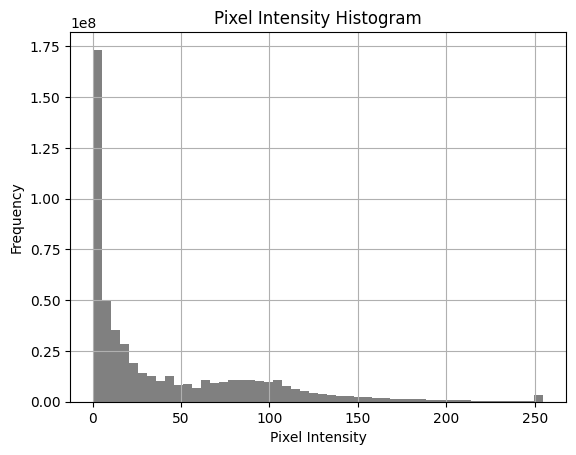

In [10]:
plot_intensity_histogram(X)

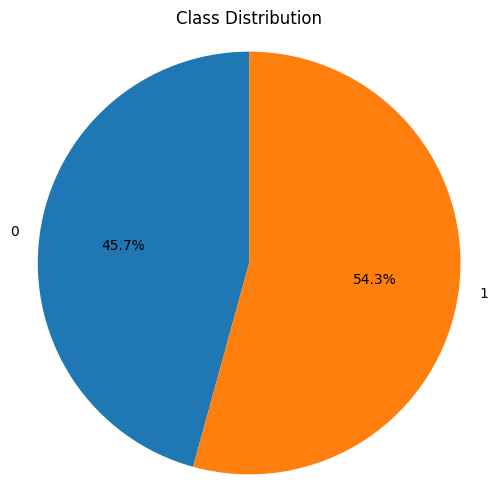

In [11]:
unique_labels, class_counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=unique_labels, autopct='%1.1f%%', startangle=90)
plt.title("Class Distribution")
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

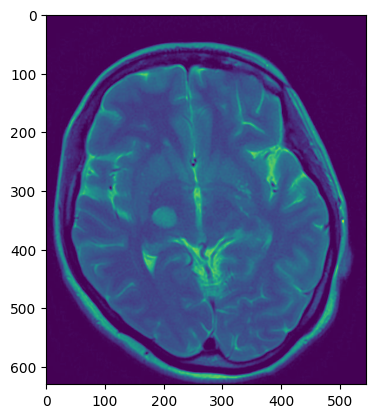

In [12]:
plt.imshow(X[0])

## Preprocessing Pipeline

This section prepares the CT scan images for machine learning. We apply a consistent set of transformations to all images, including:

- Conversion to grayscale numpy arrays (already handled during loading)
- Normalization of pixel values to [0, 1]
- Resizing images to 224x224
- Optional handling of class imbalance (oversampling)

These steps ensure the input data is consistent in format and scale, which improves model training.


## Data Splitting

We split the data into Train, Validation, and Test sets in a 70:15:15 ratio.

Key Considerations:
- Ensured balanced class representation across all splits.
- No patient overlap (if patient IDs are available – here, we assume file-level uniqueness).


## **🧠 Functional Preprocessing Code**


In [13]:
def normalize_image(img, to_range=(0, 1)):
    img = img.astype(np.float32)
    min_val, max_val = np.min(img), np.max(img)
    norm_img = (img - min_val) / (max_val - min_val + 1e-8)
    if to_range == (-1, 1):
        norm_img = norm_img * 2 - 1
    return norm_img

def resize_image(img, size=(224, 224)):
    return cv2.resize(img, size, interpolation=cv2.INTER_AREA)

def preprocess_image(img, size=(224, 224), to_range=(0, 1)):
    return normalize_image(resize_image(img, size), to_range)

def apply_preprocessing(X, size=(224, 224), to_range=(0, 1)):
    return list(map(partial(preprocess_image, size=size, to_range=to_range), tqdm(X, desc="Preprocessing images")))

def split_data(X, y, train_size=0.7, val_size=0.15, test_size=0.15):
    X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=test_size, stratify=y, random_state=42)
    val_ratio = val_size / (train_size + val_size)
    X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=val_ratio, stratify=y_temp, random_state=42)
    return (X_train, y_train), (X_val, y_val), (X_test, y_test)


In [14]:
X_processed = apply_preprocessing(X, size=(224, 224), to_range=(0, 1))

Preprocessing images: 100%|██████████| 2375/2375 [00:02<00:00, 1134.73it/s]


In [15]:
(train_X, train_y), (val_X, val_y), (test_X, test_y) = split_data(X_processed, y)
print(f"Train: {len(train_X)}, Val: {len(val_X)}, Test: {len(test_X)}")

Train: 1661, Val: 357, Test: 357


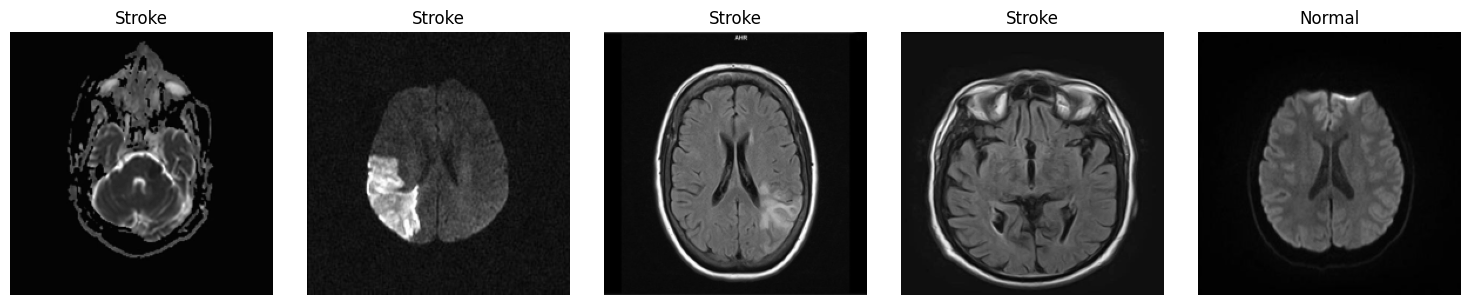

In [16]:
visualize_samples(train_X, train_y)

In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import f1_score
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# --- Custom Dataset Class ---
class CustomDataset(Dataset):
    def __init__(self, X, y, augment=False):
        self.X = np.expand_dims(X, axis=1).astype(np.float32)  # (N, 1, H, W)
        self.y = np.array(y).astype(np.float32)
        self.augment = augment

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        x = self.X[idx]
        y = self.y[idx]
        # Apply augmentations if needed
        return torch.tensor(x), torch.tensor(y)


def to_torch_dataloader(X, y, batch_size=32, shuffle=True, augment=False):
    dataset = CustomDataset(X, y, augment=augment)
    return DataLoader(dataset, batch_size=batch_size, shuffle=shuffle)

# --- Enhanced CNN Model ---
class EnhancedCNN(nn.Module):
    def __init__(self):
        super(EnhancedCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.pool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.pool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.pool3 = nn.MaxPool2d(2)

        self.conv4 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.global_pool = nn.AdaptiveAvgPool2d((1, 1))

        self.fc1 = nn.Linear(256, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, 1)

    def forward(self, x):
        x = F.relu(self.bn1(self.conv1(x)))
        x = self.pool1(x)

        x = F.relu(self.bn2(self.conv2(x)))
        x = self.pool2(x)

        x = F.relu(self.bn3(self.conv3(x)))
        x = self.pool3(x)

        x = F.relu(self.bn4(self.conv4(x)))
        x = self.global_pool(x)

        x = torch.flatten(x, 1)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)  # No sigmoid — we'll use BCEWithLogitsLoss
        return x

# --- Optimizer, Loss and Scheduler ---
def get_loss():
    return nn.BCEWithLogitsLoss()

def get_optimizer(model, lr=1e-4):
    return torch.optim.Adam(model.parameters(), lr=lr)

def get_scheduler(optimizer):
    return torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3)


In [19]:
# --- Plotting Training History ---
def plot_training_history(history, metrics=('loss', 'accuracy', 'auc')):
    epochs = range(1, len(history['loss']) + 1)
    plt.figure(figsize=(5 * len(metrics), 4))

    for i, metric in enumerate(metrics):
        plt.subplot(1, len(metrics), i + 1)
        plt.plot(epochs, history[metric], label=f'Train {metric}')
        if f'val_{metric}' in history:
            plt.plot(epochs, history[f'val_{metric}'], label=f'Val {metric}')
        plt.xlabel('Epochs')
        plt.ylabel(metric.capitalize())
        plt.title(f'{metric.capitalize()} Over Epochs')
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

In [20]:
train_ds = to_torch_dataloader(train_X, train_y)
val_ds = to_torch_dataloader(val_X, val_y, shuffle=False)
test_ds = to_torch_dataloader(test_X, test_y, shuffle=False)

model = EnhancedCNN()
optimizer = get_optimizer(model)
criterion = get_loss()


EnhancedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1

In [21]:
best_val_auc = 0
history = {'loss': [], 'accuracy': [], 'auc': [], 'val_loss': [], 'val_accuracy': [], 'val_auc': []}

scheduler = get_scheduler(optimizer)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

for epoch in range(20):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    y_true_train, y_pred_train = [], []

    for inputs, labels in train_ds:
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(preds.cpu().numpy())

    train_loss = running_loss / total
    train_acc = correct / total
    train_auc = f1_score(y_true_train, y_pred_train)

    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    y_true_val, y_pred_val = [], []

    with torch.no_grad():
        for inputs, labels in val_ds:
            inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = (outputs > 0.5).float()
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            y_true_val.extend(labels.cpu().numpy())
            y_pred_val.extend(preds.cpu().numpy())

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_auc = f1_score(y_true_val, y_pred_val)

    history['loss'].append(train_loss)
    history['accuracy'].append(train_acc)
    history['auc'].append(train_auc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    history['val_auc'].append(val_auc)

    scheduler.step(val_loss)  # 🔁 Optional LR scheduler

    print(f"Epoch {epoch+1}/20 | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, AUC: {train_auc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, AUC: {val_auc:.4f}")

    # Save best model
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        torch.save(model.state_dict(), 'best_model.pth')


Epoch 1/35 | Train Loss: 0.5652, Acc: 0.6382, AUC: 0.5478 | Val Loss: 0.6038, Acc: 0.5098, AUC: 0.1784
Epoch 2/35 | Train Loss: 0.4481, Acc: 0.7797, AUC: 0.7710 | Val Loss: 0.4137, Acc: 0.8095, AUC: 0.8419
Epoch 3/35 | Train Loss: 0.3883, Acc: 0.8278, AUC: 0.8228 | Val Loss: 0.3011, Acc: 0.9188, AUC: 0.9227
Epoch 4/35 | Train Loss: 0.3303, Acc: 0.8663, AUC: 0.8683 | Val Loss: 0.2778, Acc: 0.8796, AUC: 0.8775
Epoch 5/35 | Train Loss: 0.2911, Acc: 0.8850, AUC: 0.8869 | Val Loss: 0.2738, Acc: 0.9020, AUC: 0.9114
Epoch 6/35 | Train Loss: 0.2811, Acc: 0.8814, AUC: 0.8842 | Val Loss: 0.2954, Acc: 0.9048, AUC: 0.9096
Epoch 7/35 | Train Loss: 0.2499, Acc: 0.8989, AUC: 0.9018 | Val Loss: 0.2147, Acc: 0.9104, AUC: 0.9121
Epoch 8/35 | Train Loss: 0.2281, Acc: 0.9025, AUC: 0.9061 | Val Loss: 0.2824, Acc: 0.8964, AUC: 0.9095
Epoch 9/35 | Train Loss: 0.2067, Acc: 0.9175, AUC: 0.9200 | Val Loss: 0.1771, Acc: 0.9188, AUC: 0.9205
Epoch 10/35 | Train Loss: 0.1790, Acc: 0.9332, AUC: 0.9365 | Val Loss: 0.

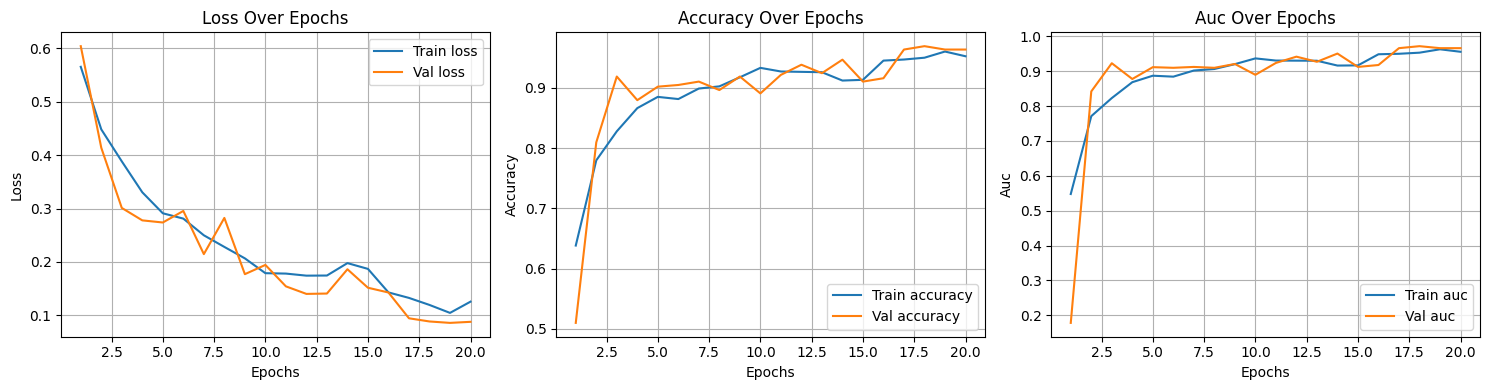

In [22]:
plot_training_history(history, metrics=('loss', 'accuracy', 'auc'))

In [23]:
# --- Evaluate on Test Set ---
print("\n✅ Loading best model for evaluation...")
model.load_state_dict(torch.load('/kaggle/working/best_model.pth'))
model.eval()

y_true_test, y_pred_test = [], []

with torch.no_grad():
    for inputs, labels in test_ds:
        inputs = inputs.to(device)
        labels = labels.to(device).unsqueeze(1)
        outputs = model(inputs)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(preds.cpu().numpy())


✅ Loading best model for evaluation...


/tmp/ipykernel_31/2592587979.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/best_model.pth'))


In [24]:
# --- Metrics ---
from sklearn.metrics import classification_report, confusion_matrix

print("\n🧾 Classification Report:")
print(classification_report(y_true_test, y_pred_test, target_names=["Normal", "Stroke"]))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_true_test, y_pred_test))


🧾 Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.93      0.95       163
      Stroke       0.94      0.97      0.96       194

    accuracy                           0.95       357
   macro avg       0.95      0.95      0.95       357
weighted avg       0.95      0.95      0.95       357


🧮 Confusion Matrix:
[[152  11]
 [  6 188]]


In [25]:
model.eval()
test_loss, test_correct, test_total = 0.0, 0, 0
y_true_test, y_pred_test = [], []
with torch.no_grad():
    for inputs, labels in test_ds:
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).float()
        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(preds.cpu().numpy())

test_loss /= test_total
test_accuracy = test_correct / test_total
test_auc = f1_score(y_true_test, y_pred_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

Test Loss: 0.12835672170090742
Test Accuracy: 0.9523809523809523
Test AUC: 0.9565217391304348


In [27]:
def visualize_predictions(model, dataloader, num_samples=20):
    model.eval()
    data_iter = iter(dataloader)
    plt.figure(figsize=(20, 4))
    shown = 0

    with torch.no_grad():
        while shown < num_samples:
            inputs, labels = next(data_iter)
            inputs = inputs.to(device)
            outputs = model(inputs)
            preds = (outputs > 0.5).float().cpu().numpy().flatten()
            inputs = inputs.cpu().numpy()
            labels = labels.numpy()

            for i in range(len(inputs)):
                if shown >= num_samples:
                    break
                plt.subplot(2, 10, shown + 1)
                img = inputs[i][0]  # grayscale
                true_label = labels[i]
                pred_label = preds[i]
                plt.imshow(img, cmap='gray')
                plt.axis('off')
                title = f"True: {'Stroke' if true_label == 1 else 'Normal'}\nPred: {'Stroke' if pred_label > 0.5 else 'Normal'}"
                plt.title(title, fontsize=10)
                shown += 1
    plt.tight_layout()
    plt.show()

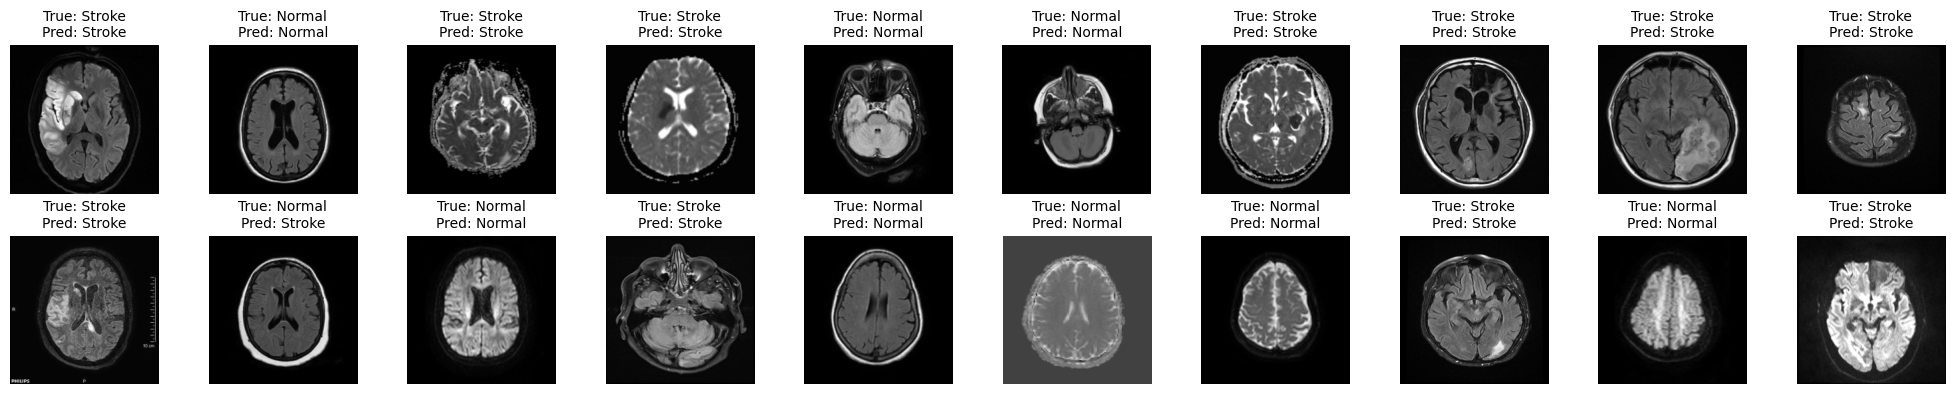

In [29]:
visualize_predictions(model, test_ds, num_samples=20)

In [30]:
train_ds = to_torch_dataloader(train_X, train_y)
val_ds = to_torch_dataloader(val_X, val_y, shuffle=False)
test_ds = to_torch_dataloader(test_X, test_y, shuffle=False)

# Model setup
model = EnhancedCNN()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = get_loss()
scheduler = get_scheduler(optimizer)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

EnhancedCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (global_pool): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc1

In [31]:
# Training loop variables
best_val_auc = 0
epochs_without_improvement = 0
early_stopping_patience = 10

history = {'loss': [], 'accuracy': [], 'auc': [],
           'val_loss': [], 'val_accuracy': [], 'val_auc': []}

for epoch in range(20):
    model.train()
    running_loss, correct, total = 0.0, 0, 0
    y_true_train, y_pred_train = [], []

    for inputs, labels in train_ds:
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        correct += (preds == labels).sum().item()
        total += labels.size(0)
        y_true_train.extend(labels.cpu().numpy())
        y_pred_train.extend(preds.cpu().numpy())

    train_loss = running_loss / total
    train_acc = correct / total
    train_auc = f1_score(y_true_train, y_pred_train)

    # --- Validation ---
    model.eval()
    val_loss, val_correct, val_total = 0.0, 0, 0
    y_true_val, y_pred_val = [], []

    with torch.no_grad():
        for inputs, labels in val_ds:
            inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)
            preds = (torch.sigmoid(outputs) > 0.5).float()
            val_correct += (preds == labels).sum().item()
            val_total += labels.size(0)
            y_true_val.extend(labels.cpu().numpy())
            y_pred_val.extend(preds.cpu().numpy())

    val_loss /= val_total
    val_acc = val_correct / val_total
    val_auc = f1_score(y_true_val, y_pred_val)

    # Record metrics
    history['loss'].append(train_loss)
    history['accuracy'].append(train_acc)
    history['auc'].append(train_auc)
    history['val_loss'].append(val_loss)
    history['val_accuracy'].append(val_acc)
    history['val_auc'].append(val_auc)

    scheduler.step(val_loss)

    print(f"Epoch {epoch+1}/20 | Train Loss: {train_loss:.4f}, Acc: {train_acc:.4f}, AUC: {train_auc:.4f} | "
          f"Val Loss: {val_loss:.4f}, Acc: {val_acc:.4f}, AUC: {val_auc:.4f}")

    # Early stopping logic
    if val_auc > best_val_auc:
        best_val_auc = val_auc
        epochs_without_improvement = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        epochs_without_improvement += 1
        if epochs_without_improvement >= early_stopping_patience:
            print("⛔ Early stopping triggered!")
            break




Epoch 1/20 | Train Loss: 0.5648, Acc: 0.7321, AUC: 0.7714 | Val Loss: 0.6033, Acc: 0.6078, AUC: 0.4400
Epoch 2/20 | Train Loss: 0.4494, Acc: 0.8092, AUC: 0.8265 | Val Loss: 0.3569, Acc: 0.8824, AUC: 0.8934
Epoch 3/20 | Train Loss: 0.3829, Acc: 0.8501, AUC: 0.8596 | Val Loss: 0.3312, Acc: 0.8768, AUC: 0.8764
Epoch 4/20 | Train Loss: 0.3443, Acc: 0.8627, AUC: 0.8729 | Val Loss: 0.2727, Acc: 0.9188, AUC: 0.9214
Epoch 5/20 | Train Loss: 0.3018, Acc: 0.8916, AUC: 0.8999 | Val Loss: 0.9522, Acc: 0.6919, AUC: 0.7791
Epoch 6/20 | Train Loss: 0.2877, Acc: 0.8946, AUC: 0.9006 | Val Loss: 0.2743, Acc: 0.8487, AUC: 0.8750
Epoch 7/20 | Train Loss: 0.2215, Acc: 0.9253, AUC: 0.9307 | Val Loss: 0.1786, Acc: 0.9384, AUC: 0.9409
Epoch 8/20 | Train Loss: 0.2327, Acc: 0.9145, AUC: 0.9212 | Val Loss: 0.3291, Acc: 0.8431, AUC: 0.8333
Epoch 9/20 | Train Loss: 0.1965, Acc: 0.9247, AUC: 0.9300 | Val Loss: 0.1398, Acc: 0.9580, AUC: 0.9608
Epoch 10/20 | Train Loss: 0.1810, Acc: 0.9362, AUC: 0.9406 | Val Loss: 0.

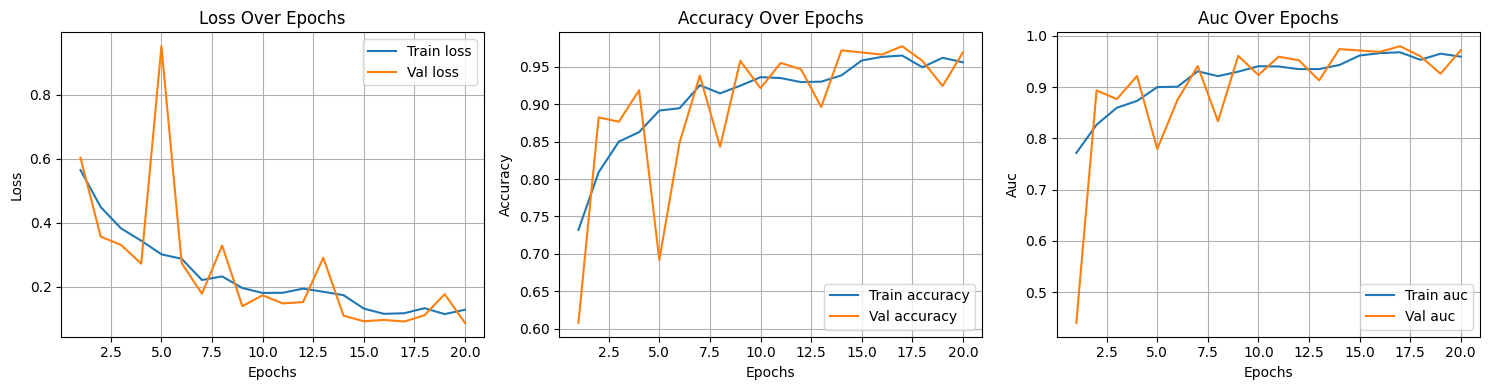

In [32]:
plot_training_history(history, metrics=('loss', 'accuracy', 'auc'))

In [33]:
torch.save(model.state_dict(), 'Strike_2#_best_model.pth')

In [38]:
# --- Evaluate on Test Set ---
print("\n✅ Loading best model for evaluation...")
model.load_state_dict(torch.load('/kaggle/working/Strike_2#_best_model.pth'))
model.eval()

y_true_test, y_pred_test = [], []

with torch.no_grad():
    for inputs, labels in test_ds:
        inputs = inputs.to(device)
        labels = labels.to(device).unsqueeze(1)
        outputs = model(inputs)
        preds = (torch.sigmoid(outputs) > 0.5).float()
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(preds.cpu().numpy())


✅ Loading best model for evaluation...


/tmp/ipykernel_31/2421613561.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('/kaggle/working/Strike_2#_best_model.pth'))


In [39]:
# --- Metrics ---
from sklearn.metrics import classification_report, confusion_matrix

print("\n🧾 Classification Report:")
print(classification_report(y_true_test, y_pred_test, target_names=["Normal", "Stroke"]))

print("\n🧮 Confusion Matrix:")
print(confusion_matrix(y_true_test, y_pred_test))


🧾 Classification Report:
              precision    recall  f1-score   support

      Normal       0.96      0.94      0.95       163
      Stroke       0.95      0.97      0.96       194

    accuracy                           0.96       357
   macro avg       0.96      0.95      0.95       357
weighted avg       0.96      0.96      0.96       357


🧮 Confusion Matrix:
[[153  10]
 [  6 188]]


In [34]:
model.eval()
test_loss, test_correct, test_total = 0.0, 0, 0
y_true_test, y_pred_test = [], []
with torch.no_grad():
    for inputs, labels in test_ds:
        inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        preds = (outputs > 0.5).float()
        test_correct += (preds == labels).sum().item()
        test_total += labels.size(0)
        y_true_test.extend(labels.cpu().numpy())
        y_pred_test.extend(preds.cpu().numpy())

test_loss /= test_total
test_accuracy = test_correct / test_total
test_auc = f1_score(y_true_test, y_pred_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
print(f"Test AUC: {test_auc}")

Test Loss: 0.13862061398286446
Test Accuracy: 0.9467787114845938
Test AUC: 0.950391644908616


In [35]:
# --- Save the model ---
torch.save(model.state_dict(), 'Stroke.pth')

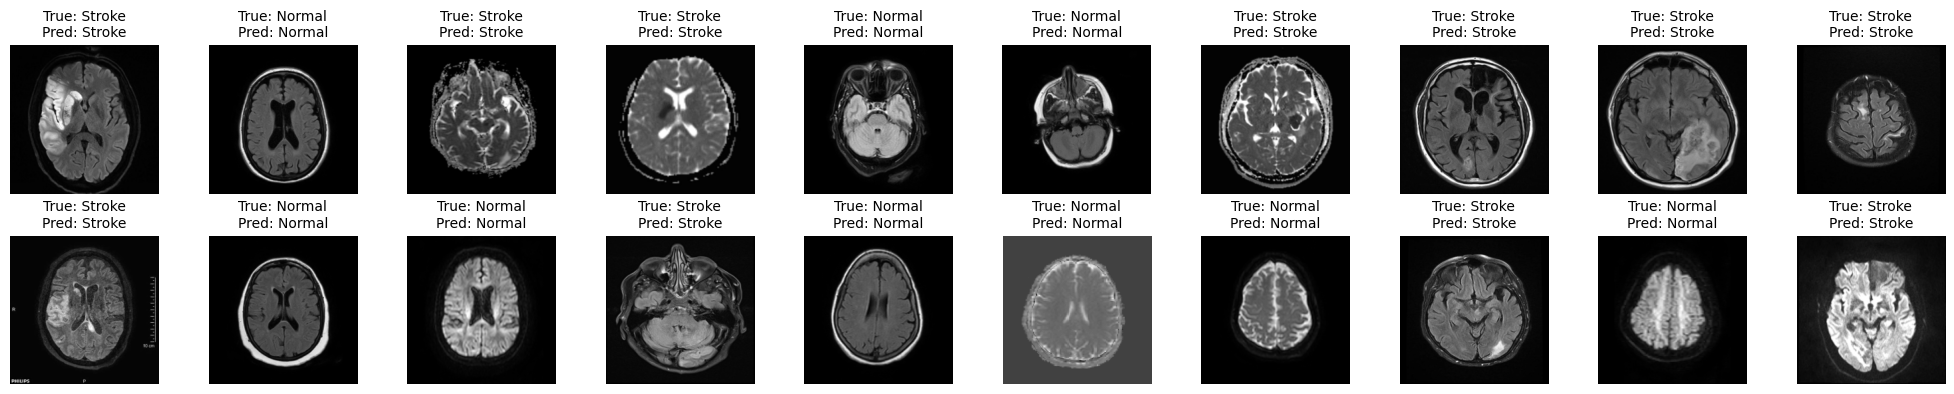

In [36]:
visualize_predictions(model, test_ds, num_samples=20)